<p>
<h1><b><center></center></b></h1>
<center><img src="https://drive.google.com/uc?id=1UJc1ci41G6ahJ7ProKvunUOIBcTXZ6ZG" align="center" width="550"></center>
</p>
<h1><b><center>Mecánica Celeste</center></b></h1>
<h2><b><center>Prof. Jorge I. Zuluaga</center></b></h1>
<h2><b><center>Tarea 5 (opcional)</center></b><h2>
<h3><b><center>Una misión interplanetaria</center></b><h3>
<h5><center><b>Asignada</b>: 5 de diciembre de 2024</center><h5>
<h5><center><b>Entrega</b>: (Por determinarse)</center><h5>

<hr/>
<b>Nombre</b>: Simón Patiño
<br/>
<hr/>

## Enunciado

**Objetivo**: El objetivo de esta tarea es calcular todas las maniobras, desde la salida de una órbita de parqueo, hasta la llegada a una órbita circumplanetaria de una misión.

Para ello deben elegir el planeta que escogieron para realizar la Tarea 3 (ver instrucciones abajo)

**Instrucciones para elegir el planeta**: tome el último dígito de la cédula y saque el módulo a 5 (digito % 5). Esto le dará un número entre 0 y 4. Con este número escoja su planeta así: 0: Mercurio, 1: Venus, 2: Marte, 3: Júpiter, 4: Saturno.


**Procedimiento**:

Una agencia espacial planea enviar una carga útil científica con hasta un planeta. Para ello debe calcular las distintas maniobras que debe realizar desde su lanzamiento en una órbita de parqueo circular ubicada a 1.8 radios terrestres, pasando por una maniobra intermedia en la trayectoria interplanetaria, hasta una maniobra de inserción en el planeta destino.

Para ello:

1. Calcular la primera fecha de lanzamiento y de llegada óptima después del 2030-01-01, es decir aquella que minimice la energía $C_3$. Para la fecha de lanzamiento elegida calcular: el tiempo de vuelo de la misión. Para esa misma fecha calcule el ángulo que forman los radiovectores dirigidos a los dos planetas.

2. Para simplificar los cálculos en lo sucesivo, asumiremos que la Tierra y el planeta tienen órbitas coplanares y circulares con un radio igual al semiejemayor instantáneo de la fecha de lanzamiento. Para los cálculos a continuación vamos a asumir que la Tierra esta sobre el eje X ($M=0$) y el planeta destino está inicialmente en una anomalía media igual al ángulo calculado en 1. Con estas condiciones, calcular, resolviendo el problema de Lambert y asumiendo como tiempo de vuelo el obtenido en 1, la velocidad de salida de la órbita de la Tierra y la velocidad de llegada a la órbita del planeta. Verificar que la órbita de transferencia sea una órbita elíptica. Con estas velocidades calcule la velocidad del vehículo relativa a la Tierra a la salida ($v_{\infty1}$) y la velocidad relativa al planeta a la llegada ($v_{\infty2}$). Compare está última velocidad con el valor de $C_3$ obtenido en 1.

3. Calcule usando el método de *patched conics* las propiedades de la órbita hiperbólica de salida desde la órbita de parqueo alrededor de la Tierra ($q$, $e$, $a$, $\omega$).

4. Simule partiendo de los elementos calculados en 3 y usando REBOUND la trayectoria de la nave espacial saliendo desde la Tierra hasta su llegada al planeta destino sin hacer ninguna corrección en el curso de la órbita. ¿A qué distancia del planeta destino llega la nave en el tiempo de transferencia $t_f$ calculado en 1? ¿está la nave adentro de la esfera de influencia del planeta destino?

5. Vamos ahora a hacer una corrección de la órbita *en curso* para conseguir llegar a la órbita de parqueo final en el planeta destino. Para ello integre la órbita hasta un tiempo $t = \beta t_f$ donde $\beta$ puede escogerse a conveniencia (sugerencia $\beta = 0.9$). En ese punto, aplique un pequeño $\delta v$ a la nave para modificar su trayectoria (usamos la letra minúscula "$\delta$" para indicar que es una maniobra de corrección). El $\delta v$ puede aplicarse en la dirección de movimiento que tiene la nave en ese momento y puede ser positivo o negativo (en la dirección de movimiento o en dirección contraria). Modifique el valor del $\delta v$ hasta conseguir que la distancia más pequeña a la que se aproxima la nave al planeta destino (periastro) es igual a 3 veces su radio. Si no lo consigue, pruebe aplicando el $\delta v$ en un ángulo diferente.

6. Calcule la velocidad que tiene la nave, relativa al planeta destino, en el momento del periastro. Con esa velocidad calcule el valor del $\Delta v$ necesario para que el vehículo quede parqueado en una órbita circular circumplanetaria de radio igula a 3 radios planetarios.  Finalmente calcule el $\Delta v$ total de la misión, incluyendo el de la salida, la corrección de curso y el de la llegada.

- **Atención**: En caso de utilizar ayudas como `ChatGPT` o códigos de `Stack Over Flow` debe citar debidamente la fuente, pero también entender a cabalidad el código, el profesor puede pedir justificación.

## Solución

In [ ]:
!pip install -Uq rebound pymcel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 785.9/785.9 kB 12.9 MB/s eta 0:00:00


In [ ]:
import pymcel as pc
from pymcel.extra import solucion_lambert
import numpy as np
import matplotlib.pyplot as plt
from astropy.time import Time
from scipy.optimize import fsolve
from scipy.integrate import odeint
import rebound as rb

print(pc.version)

0.6.13


##*Extracción de datos*

In [ ]:
mu = pc.constantes.G * pc.constantes.M_sun
direccion = 'pro'

fechas_salida = dict(start='2030-01-01',stop='2032-01-30',step='5d')
fechas_llegada = dict(start='2032-01-30',stop='2032-12-30',step='5d')

Xtierra, ts_salida, Xtierra_df = pc.consulta_spice(id='399', location='@0', epochs=fechas_salida)
Xmarte, ts_llegada, Xmarte_df = pc.consulta_spice(id='4', location='@0', epochs=fechas_llegada)

len(ts_salida), len(ts_llegada), len(ts_salida)*len(ts_llegada)

/usr/local/lib/python3.10/dist-packages/erfa/core.py:133: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)


(153, 68, 10404)

In [ ]:
TDS, TAS = np.meshgrid(
    Time(ts_salida,format='jd').to_datetime(),
    Time(ts_llegada,format='jd').to_datetime(),
)
ts_salida[0], ts_llegada[0]

/usr/local/lib/python3.10/dist-packages/erfa/core.py:133: ErfaWarning: ERFA function "d2dtf" yielded 153 of "dubious year (Note 5)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)
/usr/local/lib/python3.10/dist-packages/erfa/core.py:133: ErfaWarning: ERFA function "d2dtf" yielded 68 of "dubious year (Note 5)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)


(2462502.5, 2463261.5)

##*Diagrama de chuleta de cerdo*

/usr/local/lib/python3.10/dist-packages/pymcel/extra.py:122: RuntimeWarning: overflow encountered in sinh
  return (np.sinh(np.sqrt(-z)) - np.sqrt(-z)) / (np.sqrt(-z)) ** 3
/usr/local/lib/python3.10/dist-packages/pymcel/extra.py:111: RuntimeWarning: overflow encountered in cosh
  return (np.cosh(np.sqrt(-z)) - 1) / (-z)
/usr/local/lib/python3.10/dist-packages/pymcel/extra.py:40: RuntimeWarning: invalid value encountered in scalar divide
  return r1 + r2 + A * (z * S(z) - 1) / np.sqrt(C(z))


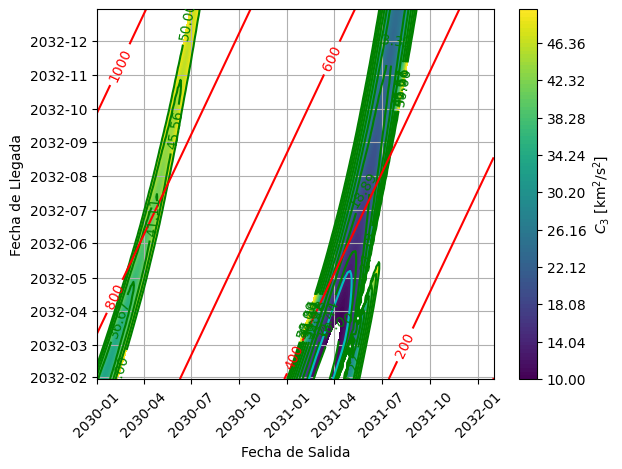

In [ ]:
C3s = np.zeros((len(ts_llegada),len(ts_salida)))
TFs = np.zeros((len(ts_llegada),len(ts_salida)))
elementos_orbitales_a = np.zeros((len(ts_llegada),len(ts_salida)))
#This line is for save velocity of arrive
v2s = np.zeros((len(ts_llegada),len(ts_salida)))
for id,td in enumerate(ts_salida):
  for ia,ta in enumerate(ts_llegada):
    tf = (ta - td)*86400 # s
    P1 = Xtierra[id,:3]
    P2 = Xmarte[ia,:3]
    TFs[ia, id] = tf
    try:
      v1, v2, orbita = solucion_lambert(P1, P2, tf, mu=mu, direccion=direccion)
      vinf_vec = Xtierra[id,3:] - v1

    except:
      vinf_vec = 1000000*np.ones(3)
    C3s[ia, id] = np.linalg.norm(vinf_vec/1e3)**2
    v2s[ia, id] = np.linalg.norm(v2)/1e3
    elementos_orbitales_a[ia, id] = orbita["elts"][0]/(1 - orbita["elts"][1])

c = plt.contourf(TDS, TAS, C3s, levels=np.linspace(10,50,100))
cbar = plt.colorbar(c)
cbar.set_label(r'$C_3$ [km$^2$/s$^2$]')

c = plt.contour(TDS, TAS, C3s, levels=np.linspace(10,50,10),colors='g')
plt.clabel(c, inline=True, fontsize=10)

c = plt.contour(TDS, TAS, TFs/86400, levels=5,colors='r')
plt.clabel(c, inline=True, fontsize=10)

plt.contour(TDS, TAS, C3s, levels=[13], colors='c')

plt.xlabel('Fecha de Salida')
plt.ylabel('Fecha de Llegada')

plt.xticks(rotation=45)
plt.grid()

##*Extracción del índice del menor $\ $  $C_3$*

In [ ]:
ij_min = np.unravel_index(C3s.argmin(), C3s.shape)

ij_min #(ia_min, id_min)

(0, 86)

##*Mejor fecha de salida y fecha de llegada*

In [ ]:
ia_min = ij_min[0]
id_min = ij_min[1]

bestDayExit = ts_salida[id_min]
bestDayArrive = ts_llegada[ia_min]

Time(bestDayExit,format='jd').to_datetime(), Time(bestDayArrive,format='jd').to_datetime(),

print("Fecha de salida:" , Time(bestDayExit,format='jd').to_datetime())
print("Fecha de llegada:" , Time(bestDayArrive,format='jd').to_datetime())

Fecha de salida: 2031-03-07 00:00:00
Fecha de llegada: 2032-01-30 00:00:00


/usr/local/lib/python3.10/dist-packages/erfa/core.py:133: ErfaWarning: ERFA function "d2dtf" yielded 1 of "dubious year (Note 5)"
  warn(f'ERFA function "{func_name}" yielded {wmsg}', ErfaWarning)


March 7, 2031 at midnight (00:00:00).

January 30, 2032 at midnight (00:00:00).

##*Tiempo de vuelo*

In [ ]:
tf = (Time(bestDayArrive,format='jd').to_datetime() - Time(bestDayExit,format='jd').to_datetime())
tf.days/30

print("El tiempo de vuelo es {} meses".format( tf.days/30))
tf = tf.days*86400 # s

El tiempo de vuelo es 10.966666666666667 meses


##*Velocidad  $V_{∞}$*

In [ ]:
vinf_exit = np.sqrt(C3s.min())

print(vinf_exit, "km/s")

2.8540942481656018 km/s


##*Radiovectores en el dia de lanzamiento*

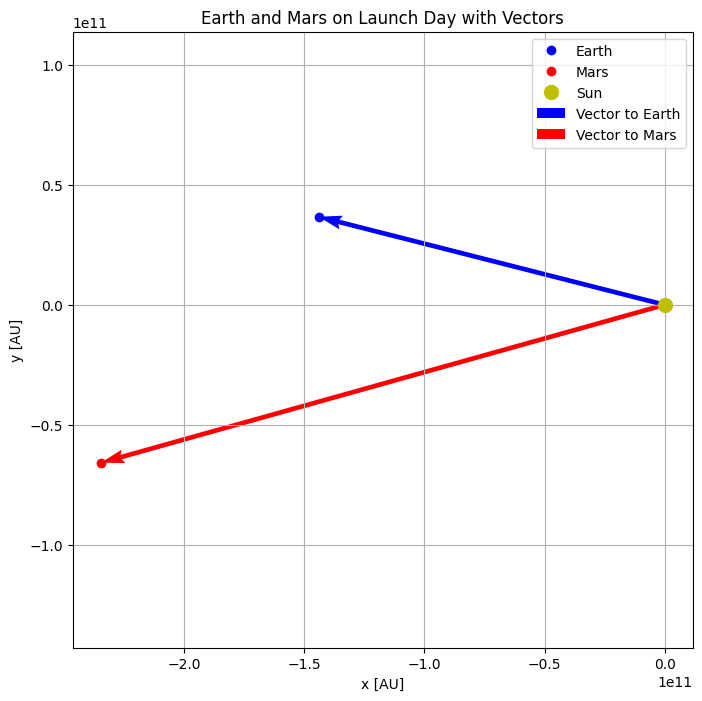

In [ ]:
consulta =dict(start='2031-03-07',stop='2031-03-07' , step = "1d") #dia del lanzamiento

Xmarte_dia_l, ts_dia_l, Xmarte_df_dia_l = pc.consulta_spice(id='4', location='@0', epochs=consulta)


rearth = Xtierra[id_min,:3]
rmars = Xmarte_dia_l[:3]
c = rearth - rmars


r_earth = np.linalg.norm(rearth)
r_mars = np.linalg.norm(rmars)

plt.figure(figsize=(8, 8))

# Plot planets and Sun
plt.plot(rearth[0], rearth[1], 'o', label='Earth', color='blue')
plt.plot(rmars[0], rmars[1], 'o', label='Mars', color='red')
plt.plot(0, 0, "yo", label="Sun", markersize=10)

# Add vectors
plt.quiver(0, 0, rearth[0], rearth[1], angles="xy", scale_units="xy", scale=1, color='blue', label="Vector to Earth")
plt.quiver(0, 0, rmars[0], rmars[1], angles="xy", scale_units="xy", scale=1, color='red', label="Vector to Mars")

# Labels and layout
plt.xlabel('x [AU]')
plt.ylabel('y [AU]')
plt.title('Earth and Mars on Launch Day with Vectors')
plt.axis("equal")
plt.legend()
plt.grid()
plt.show()

In [ ]:
rearth_mag = np.linalg.norm(rearth)
rmars_mag = np.linalg.norm(rmars)
c_mag = np.linalg.norm(c)

print(rearth_mag, rmars_mag, c_mag)

148654862882.6004 243639767191.46567 136700457790.96317


##*Angulo entre los radiovectores*

In [ ]:
gamma = np.arccos((c_mag**2 - rearth_mag**2 - rmars_mag**2)/(-2*rearth_mag*rmars_mag)) #Ley de coseno

print("El angulo entre los radiovectores es {} grados".format(gamma*180/np.pi))

El angulo entre los radiovectores es 29.93703499182148 grados


##*Punto 2*

##*Semiejemayor instantáneo de la fecha de lanzamiento*

In [ ]:
#Promedio
semi_major_axis_au = 1.523679  # Semi-major axis of Mars in AU
au_to_meters = 1.496e11  # Conversion factor: 1 AU to meters

# Radius of circular orbit
a2 = semi_major_axis_au * au_to_meters

a2 #metros

227942378400.0

##*Posición final de Marte*

In [ ]:
#Estrella
mus = pc.constantes.G*pc.constantes.M_sun
#Planeta de salida
e1 = 0
a1 = au_to_meters
mu1 = pc.constantes.G*pc.constantes.M_earth
#Planeta de llegada
e2 = 0
M_mars = 6.39e23 #kg
mu2 = pc.constantes.G*M_mars #masa marte
#Orbita de parqueo
muv = 0
ev = 0
av = pc.constantes.R_earth*1.8

sim = rb.Simulation()
sim.units = 'm', 'kg', 's'

sim.add(m=mus/pc.constantes.G,hash='Star')
sim.add(m=mu1/pc.constantes.G,a=a1,e=e1,hash='Planet1')
#sim.add(m=muv,a=av,e=ev,hash='Vehicle',primary='Planet1')
sim.add(m=mu2/pc.constantes.G,a=a2,e=e2, M = gamma ,hash='Planet2') #anomalia media inicial tomada

sim.save_to_file('sistema.dat')
sim.status()

---------------------------------
REBOUND version:     	4.4.5
REBOUND built on:    	Nov 27 2024 19:16:55
Number of particles: 	3
Selected integrator: 	ias15
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.001000
---------------------------------
<rebound.particle.Particle object at 0x7fb47c0f4ec0, m=1.988409870698051e+30 x=0.0 y=0.0 z=0.0 vx=0.0 vy=0.0 vz=0.0>
<rebound.particle.Particle object at 0x7fb47c0f46c0, m=5.972167867791379e+24 x=149600000000.0 y=0.0 z=0.0 vx=0.0 vy=29784.03370387285 vz=0.0>
<rebound.particle.Particle object at 0x7fb47c0f4ec0, m=6.39e+23 x=197529468651.1378 y=113754184068.04799 z=0.0 vx=-12041.460009231114 vy=20909.542645698926 vz=0.0>
---------------------------------
The following fields have non-default values:
G:
< 1.000000e+00
---
> 6.674080e-11
N:
< 0
---
> 3
python_unit_l:
< 0
---
> 1452969904
python_unit_m:
< 0
---
> 1920155205
python_unit_t:
< 0
---
> 619056205
rand_seed:
< 666036
---
> 654782
particles:
> (384 bytes, values not pr

##*Posiciónes Iniciales*

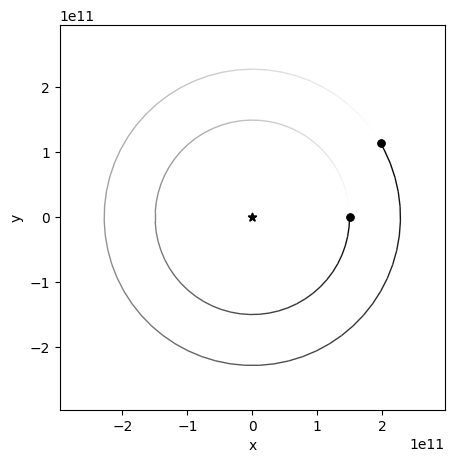

In [ ]:
rb.OrbitPlot(sim)

In [ ]:
P1 = np.array(sim.particles[1].xyz)
V1 = np.array(sim.particles[1].vxyz)

P1, V1 , pc.constantes.R_earth

(array([1.496e+11, 0.000e+00, 0.000e+00]),
 array([    0.        , 29784.03370387,     0.        ]),
 6378100.0)

##*Posiciónes finales*

In [ ]:
sim.integrate(tf)
P2 = np.array(sim.particles[2].xyz)
V2 = np.array(sim.particles[2].vxyz)

P2, V2

(array([-2.10828306e+11, -8.66478847e+10,  0.00000000e+00]),
 array([  9172.17628665, -22317.62287645,      0.        ]))

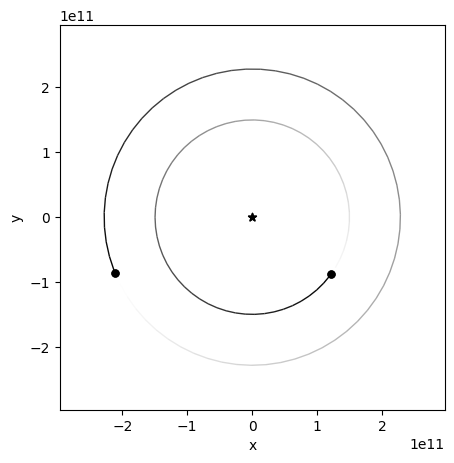

In [ ]:
rb.OrbitPlot(sim)

##*Solución con Lamberd ( $V_{∞, 1}$  y $V_{∞, 2}$)*

In [ ]:
v1_lam, v2_lam, conds = solucion_lambert(P1,P2,tf , mu=mus, direccion=direccion)
v1_lam, v2_lam, conds

(array([  859.89590558, 32965.82404433,    -0.        ]),
 array([ 11089.39613327, -18834.352194  ,      0.        ]),
 {'z': 13.615355636068625,
  'elts': array([1.49324834e+11, 2.27290533e-01, 0.00000000e+00, 0.00000000e+00,
         6.14212996e+00, 8.65911807e-02, 0.00000000e+00, 1.32712440e+20])})

In [ ]:
vinf1_vec = v1_lam  - V1

C3_new = np.linalg.norm(vinf1_vec/1e3)**2

print("El nuevo C3 es {} km^2/s^2".format(C3_new))
print("\n")
print("El viejo C3 era {} km^2/s^2".format(C3s.min()))

El nuevo C3 es 10.863210739080126 km^2/s^2


El viejo C3 era 8.14585397741197 km^2/s^2


##*Comparación velocidades*

In [ ]:
print( "{} km/s  {} km/s".format(np.sqrt(C3s.min()), np.sqrt(C3_new)) )

2.8540942481656018 km/s  3.295938521738554 km/s


##*Con nuestra suposición de órbitas circulares, y utilizando el mismo tiempo de la maniobra con las posiciones reales de los planetas, la velocidad $V_{∞, 1}$ es un 14.7 \% más grande respecto a la original*

##*Punto 3*

##*Datos de la órbita de parqueo ($q$ y $e$)*

In [ ]:
q = av
vc = np.sqrt(mu1/q)
e = 1 + vinf1_vec@vinf1_vec/vc**2
e

1.312884683374298

##*Hallamos $a$*

In [ ]:
a = q/(1-e)
q, a #en m

(11480580.0, -36692687.78576163)

##*Ángulo de apertura de la hipérbola ( $\Psi$):*

In [ ]:
Psi = np.arccos(1/e)
Psi*180/np.pi

40.38733801859395

##*Ángulo que forma con el eje X la velocidad ($\alpha $):*

In [ ]:
alfa = np.mod(np.arctan2(vinf1_vec[1],vinf1_vec[0]),2*np.pi)
alfa*180/np.pi

74.87678863932638

 ## *Argumento del periapsis ($\omega)$*

In [ ]:
omega = alfa - (np.pi - Psi)
omega*180/np.pi

-64.73587334207969

##*Punto 4*

##*Simulación*

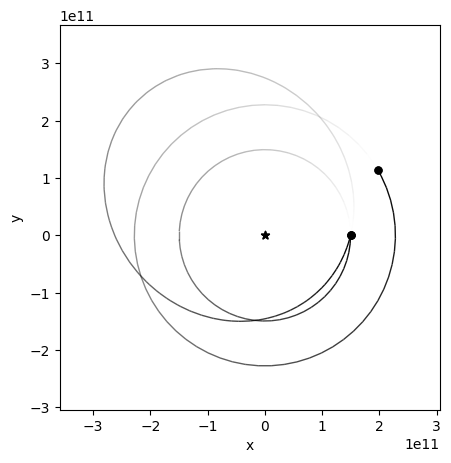

In [ ]:
sim = rb.Simulation()
sim.units = 'm', 'kg', 's'


sim.add(m=mus/pc.constantes.G,hash='Star')
sim.add(m=mu1/pc.constantes.G,a=a1,e=e1,hash='Planet1')
sim.add(m=muv/pc.constantes.G, a=a, e=e, omega = omega, hash='Vehicle',primary='Planet1')
sim.add(m=mu2/pc.constantes.G,a=a2,e=e2, M = gamma ,hash='Planet2')

sim.save_to_file('sistema.dat')

rb.OrbitPlot(sim)

(-259165583147.05682,
 219276314852.30634,
 -168476303365.37247,
 246817689968.42154)

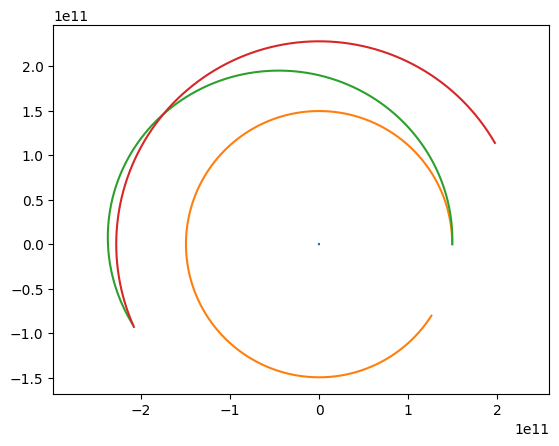

In [ ]:
ts = np.linspace(0,1.01*tf,10000)
Xs = np.zeros((sim.N,len(ts),6))
for i,t in enumerate(ts):
  sim.integrate(t)
  sim.move_to_com()
  for n in range(sim.N):
    Xs[n,i,:3] = sim.particles[n].xyz
    Xs[n,i,3:] = sim.particles[n].vxyz

for n in range(sim.N):
  plt.plot(Xs[n,:,0],Xs[n,:,1])

plt.axis('equal')

##*Revisamos las posiciónes finales*

In [ ]:
Xs[2, -1, :3] , Xs[3, -1, :3]  #Posición final del vehiculo y de marte

(array([-2.09611745e+11, -8.98051409e+10,  0.00000000e+00]),
 array([-2.08126417e+11, -9.29544185e+10,  0.00000000e+00]))

##*Esfera de influencia de Marte*

In [ ]:
rSOI_MarteSol = (M_mars/pc.constantes.M_sun)**(2/5)*1.524*pc.constantes.au

print("La esfera de influencia de Marte es de {} km".format(rSOI_MarteSol/1e3))

La esfera de influencia de Marte es de 576379.2773498723 km


##*Observemos que sucede al final del tiempo de vuelo*

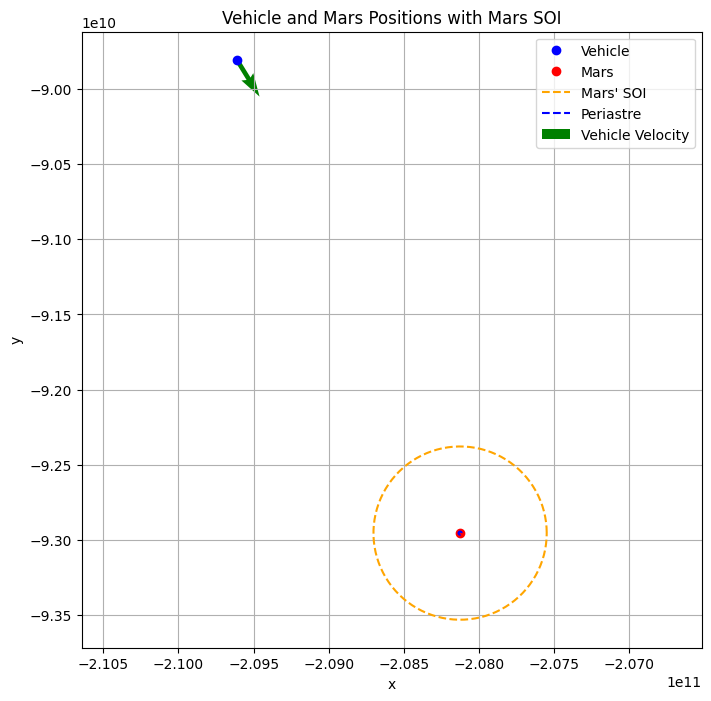

In [ ]:
# Data
vehicle_x = Xs[2, -1, :3][0]
vehicle_y = Xs[2, -1, :3][1]
mars_x = Xs[3, -1, :3][0]
mars_y = Xs[3, -1, :3][1]

vehicle_vx = Xs[2, -1, 3:][0]
vehicle_vy = Xs[2, -1, 3:][1]

# Compute Mars' SOI radius
M_mars = 6.39e23  # Mass of Mars in kg
rSOI_MarteSol = (M_mars / pc.constantes.M_sun)**(2/5) * 1.524 * pc.constantes.au

# Circle around Mars to represent its SOI
theta = np.linspace(0, 2 * np.pi, 100)  # For plotting the circle
circle_x = mars_x + rSOI_MarteSol * np.cos(theta)
circle_y = mars_y + rSOI_MarteSol * np.sin(theta)

R_Mars =3389.5*1000 #m

circle_x_p = mars_x + R_Mars*3*np.cos(theta)
circle_y_p = mars_y + R_Mars*3*np.sin(theta)

# Plotting
plt.figure(figsize=(8, 8))

# Plot vehicle and Mars positions
plt.plot(vehicle_x, vehicle_y, 'o', label='Vehicle', color='blue')
plt.plot(mars_x, mars_y, 'o', label='Mars', color='red')

# Draw SOI circle around Mars
plt.plot(circle_x, circle_y, '--', label="Mars' SOI", color='orange')

# Drawa of Periastro

plt.plot(circle_x_p, circle_y_p, '--', label="Periastre", color='b')

velocity_magnitude = np.sqrt(vehicle_vx**2 + vehicle_vy**2)
scale_factor = 0.5 * rSOI_MarteSol / velocity_magnitude  # Adjust scale for better visibility
vehicle_vx_scaled = vehicle_vx * scale_factor
vehicle_vy_scaled = vehicle_vy * scale_factor

plt.quiver(
    vehicle_x, vehicle_y,
    vehicle_vx_scaled, vehicle_vy_scaled,
    angles='xy', scale_units='xy', scale=1,
    color='green', label='Vehicle Velocity'
)

# Labels and layout
plt.xlabel('x')
plt.ylabel('y')
plt.title('Vehicle and Mars Positions with Mars SOI')
plt.axis("equal")
plt.legend()
plt.grid()
plt.show()

##*La nave no está dentro de la esfera de influencia y el periastro es muy pequeño en comparación con esta.*

##*Punto 5*

##*Creemos una rutina que nos facilite incresar el factor de corrección en $x\text{ y } y $*.

##*Tambien grafiquemos más de cerca en la esfera del periastro (Sin la SOI)*

In [ ]:
def correction(Beta, deltavx , deltavy):


  sim = rb.Simulation()
  sim.units = 'm', 'kg', 's'
  sim.add(m=mus/pc.constantes.G,hash='Star')
  sim.add(m=mu1/pc.constantes.G,a=a1,e=e1,hash='Planet1')
  sim.add(m=muv/pc.constantes.G, a=a, e=e, omega = omega, hash='Vehicle',primary='Planet1')
  sim.add(m=mu2/pc.constantes.G,a=a2,e=e2, M = gamma ,hash='Planet2')

  #Por si quiere visualizar el cambio de la orbita

  #ts = np.linspace(0,Beta*tf,2)
  #Xs = np.zeros((sim.N,len(ts),6))
  #for i,t in enumerate(ts):
   # sim.integrate(t)
    #sim.move_to_com()
    #for n in range(sim.N):
     # Xs[n,i,:3] = sim.particles[n].xyz
      #Xs[n,i,3:] = sim.particles[n].vxyz

  sim.integrate(tf*Beta)
  sim.move_to_com()

  #correction
  sim.particles[2].vxyz +=  np.array([deltavx , deltavy , 0])
  ####

  ts2 = np.linspace(Beta*tf,tf*1.01,2)
  Xs2 = np.zeros((sim.N,len(ts2),6))
  for i,t in enumerate(ts2):
    sim.integrate(t)
    sim.move_to_com()
    for n in range(sim.N):
      Xs2[n,i,:3] = sim.particles[n].xyz
      Xs2[n,i,3:] = sim.particles[n].vxyz

  # Data
  vehicle_x = Xs2[2, -1, :3][0]
  vehicle_y = Xs2[2, -1, :3][1]
  mars_x = Xs2[3, -1, :3][0]
  mars_y = Xs2[3, -1, :3][1]
  vehicle_vx = Xs[2, -1, 3:][0]
  vehicle_vy = Xs[2, -1, 3:][1]

  # Circle around Mars to represent its SOI
  circle_x = mars_x + rSOI_MarteSol * np.cos(theta)
  circle_y = mars_y + rSOI_MarteSol * np.sin(theta)
  circle_x_p = mars_x + R_Mars*3*np.cos(theta)
  circle_y_p = mars_y + R_Mars*3*np.sin(theta)

  # Plotting
  plt.figure(figsize=(8, 8))

  # Plot vehicle and Mars positions
  plt.plot(vehicle_x, vehicle_y, 'o', label='Vehicle', color='blue')
  plt.plot(mars_x, mars_y, 'o', label='Mars', color='red')

  # Draw SOI circle around Mars
  #plt.plot(circle_x, circle_y, '--', label="Mars' SOI", color='orange')
  plt.plot(circle_x_p, circle_y_p, '--', label="Pariastre", color='b')


  velocity_magnitude = np.sqrt(vehicle_vx**2 + vehicle_vy**2)
  scale_factor = 0.005 * rSOI_MarteSol / velocity_magnitude  # Adjust scale for better visibility
  vehicle_vx_scaled = vehicle_vx * scale_factor
  vehicle_vy_scaled = vehicle_vy * scale_factor

  plt.quiver(
      vehicle_x, vehicle_y,
      vehicle_vx_scaled, vehicle_vy_scaled,
      angles='xy', scale_units='xy', scale=1,
      color='green', label='Vehicle Velocity'
  )

  # Labels and layout
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title('Vehicle and Mars Positions with Mars SOI')
  plt.axis("equal")
  plt.legend(loc='upper left')
  plt.grid()
  plt.show()

  return Xs2[2, -1, 3:] , Xs2[3, -1, 3:]  # velocidad final  vehicle and mars

##*Despues de intentar muchos valores de $\delta v$ ...*

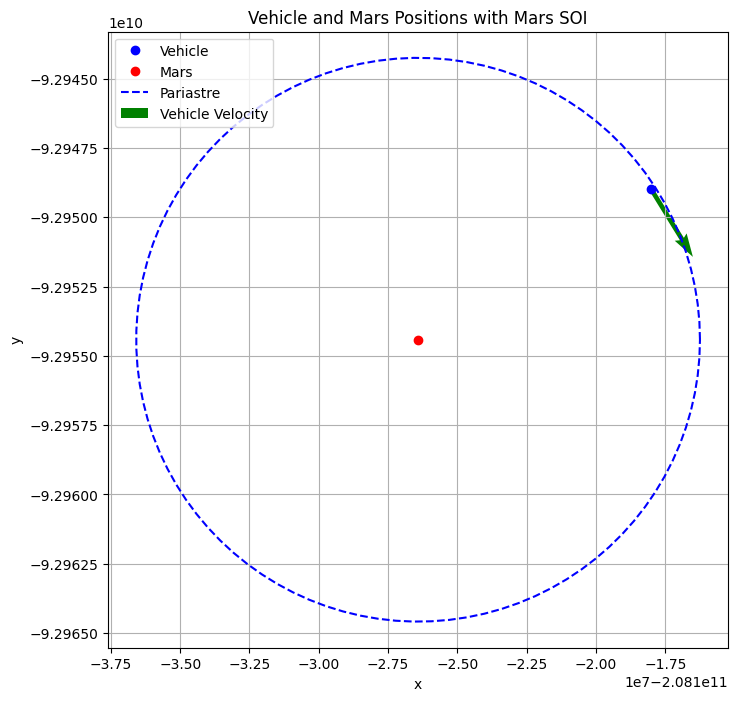

In [ ]:
V2_vec, V_marte = correction(0.9 , 474.82, -1033)

##*Calculemos el $\delta v$ utilizado*

In [ ]:
correction_v = np.sqrt(474.52**2 + 1033**2)
print("El delta v utilizado es de {} km/s".format(correction_v/1e3))

El delta v utilizado es de 1.1367753649688228 km/s


##*Es gigante 🤪*

##*Punto 6*

##*Llegada al planeta de destino*


$$
V_{∞, 2} = V_{sv} - V_{sp}
$$

In [ ]:
Vinf2_vec =  V2_vec - V_marte

Vinf2_vec

array([ 460.69017617, 4315.752286  ,    0.        ])

In [ ]:
def draw(Beta, deltavx , deltavy):


  sim = rb.Simulation()
  sim.units = 'm', 'kg', 's'
  sim.add(m=mus/pc.constantes.G,hash='Star')
  sim.add(m=mu1/pc.constantes.G,a=a1,e=e1,hash='Planet1')
  sim.add(m=muv/pc.constantes.G, a=a, e=e, omega = omega, hash='Vehicle',primary='Planet1')
  sim.add(m=mu2/pc.constantes.G,a=a2,e=e2, M = gamma ,hash='Planet2')

  #Por si quiere visualizar el cambio de la orbita

  #ts = np.linspace(0,Beta*tf,2)
  #Xs = np.zeros((sim.N,len(ts),6))
  #for i,t in enumerate(ts):
   # sim.integrate(t)
    #sim.move_to_com()
    #for n in range(sim.N):
     # Xs[n,i,:3] = sim.particles[n].xyz
      #Xs[n,i,3:] = sim.particles[n].vxyz

  sim.integrate(tf*Beta)
  sim.move_to_com()

  #correction
  sim.particles[2].vxyz +=  np.array([deltavx , deltavy , 0])
  ####

  ts2 = np.linspace(Beta*tf,tf*1.01,2)
  Xs2 = np.zeros((sim.N,len(ts2),6))
  for i,t in enumerate(ts2):
    sim.integrate(t)
    sim.move_to_com()
    for n in range(sim.N):
      Xs2[n,i,:3] = sim.particles[n].xyz
      Xs2[n,i,3:] = sim.particles[n].vxyz

  # Data
  vehicle_x = Xs2[2, -1, :3][0]
  vehicle_y = Xs2[2, -1, :3][1]
  mars_x = Xs2[3, -1, :3][0]
  mars_y = Xs2[3, -1, :3][1]
  vehicle_vx = Xs[2, -1, 3:][0]
  vehicle_vy = Xs[2, -1, 3:][1]
  mars_vx = Xs[3, -1, 3:][0]
  mars_vy = Xs[3, -1, 3:][1]

  # Circle around Mars to represent its SOI
  circle_x = mars_x + rSOI_MarteSol * np.cos(theta)
  circle_y = mars_y + rSOI_MarteSol * np.sin(theta)
  circle_x_p = mars_x + R_Mars*3*np.cos(theta)
  circle_y_p = mars_y + R_Mars*3*np.sin(theta)

  # Plotting
  plt.figure(figsize=(8, 8))

  # Plot vehicle and Mars positions
  plt.plot(vehicle_x, vehicle_y, 'o', label='Vehicle', color='blue')
  plt.plot(mars_x, mars_y, 'o', label='Mars', color='red')

  # Draw SOI circle around Mars
  #plt.plot(circle_x, circle_y, '--', label="Mars' SOI", color='orange')
  plt.plot(circle_x_p, circle_y_p, '--', label="Pariastre", color='b')


  velocity_magnitude = np.sqrt(vehicle_vx**2 + vehicle_vy**2)
  scale_factor = 0.005 * rSOI_MarteSol / velocity_magnitude  # Adjust scale for better visibility
  vehicle_vx_scaled = vehicle_vx * scale_factor
  vehicle_vy_scaled = vehicle_vy * scale_factor

  plt.quiver(
      vehicle_x, vehicle_y,
      vehicle_vx_scaled, vehicle_vy_scaled,
      angles='xy', scale_units='xy', scale=1,
      color='green', label='Vehicle Velocity'
  )

  velocity_magnitude = np.sqrt(mars_vx**2 + mars_vy**2)
  scale_factor_m = 300
  mars_vx_scaled = mars_vx * scale_factor_m
  mars_vy_scaled = mars_vy * scale_factor_m

  plt.quiver(
      mars_x, mars_y,
      mars_vx_scaled, mars_vy_scaled,
      angles='xy', scale_units='xy', scale=1,
      color='red', label='Mars Velocity'
  )

  Vinf2_vec =  (V2_vec - V_marte)*300

  plt.quiver(
      vehicle_x, vehicle_y,
      Vinf2_vec[0], Vinf2_vec[1],
      angles='xy', scale_units='xy', scale=1,
      color='k', label='Relative Velocity'
  )

  # Labels and layout
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title('Vehicle and Mars Positions with Mars SOI')
  plt.axis("equal")
  plt.legend(loc='upper left')
  plt.grid()
  plt.show()


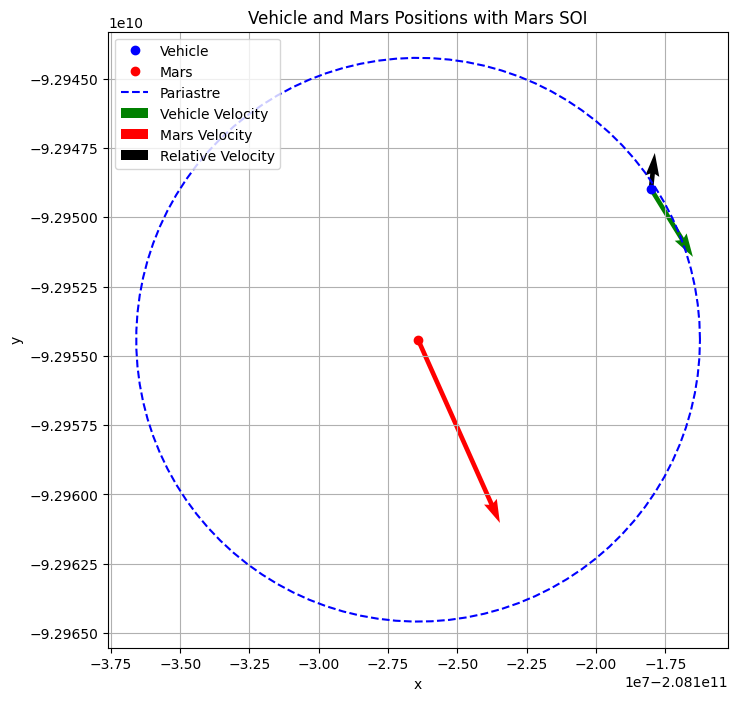

In [ ]:
draw(0.9 , 474.82, -1033)

##*El planeta esta dejando atras el vehiculo pero no importa porque realizaremos otro $\Delta V$ de inserción*

##*Magnitud del $\Delta V$ de inserción*

In [ ]:
Vinf2_mag = np.linalg.norm(Vinf2_vec)
Vinf2_mag/1e3

print("La magnitud del delta v de inserción es de {} km/s".format(Vinf2_mag/1e3))

La magnitud del delta v de inserción es de 4.340271101269237 km/s


##*Total $\Delta V$  =  $\Delta V_{\text{Llegar a la Órbita de Parqueo}}$ + $\Delta V_{\text{Salida Órbita de Parqueo}}$ +  $\Delta V_{\text{corrección}}$* + $\Delta V_{\text{Inserción en Marte}}$

In [ ]:
deltav_parqueo = np.sqrt(mu1 / (pc.constantes.R_earth*1.8)) #velocidad circular

deltav_total = deltav_parqueo + Vinf2_mag + correction_v + np.sqrt(C3s.min())

print("La magnitud del delta v total para llegar a Marte es de {} km/s".format(deltav_total/1e3))

La magnitud del delta v total para llegar a Marte es de 11.372229054023734 km/s
